# Random Walks in Various Dimensions
### Noah Chavez 10/7/2023

#### 1D

First import some packages

In [125]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

Now we can write a 1D random walk easily. We can describe the current step of the walk using just one integer. Then, for each step there is an equal chance of moving in either direction. We using a Mersenne Twister to generate pseudo random numbers to "pick" the next step. **DOES EACH DIRECTION NEED TO EQUAL FOR A RANDOM WALK?**

In [226]:
#a function to calculate average distance from the origin for a random walk of N steps
def walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = 0 #init position to the origin
    pos_history = np.array([0])

    #pick a random direction (left or right) and move that way
    while(current_step < number_of_steps):
        current_step += 1
        random_number = random.randint(0,1)
        if(random_number == 0):
            position += 1
        else:
            position -= 1
        pos_history = np.append(pos_history,position) #store the new current position


    #calculate the average position over the whole walk
    avg_pos = (sum([abs(pos_history[step]) for step in np.arange(number_of_steps)]))/(number_of_steps) #dist = abs in 1D
    #print("Average distance is: %s" % avg_pos)

    if(display_plot):
        #now plot it
        print([step for step in np.arange(number_of_steps+1)])
        print([pos_history[step] for step in np.arange(number_of_steps+1)])
        plt.plot([step for step in np.arange(number_of_steps+1)], [pos_history[step] for step in np.arange(number_of_steps+1)],color="blue")
        plt.axhline(y=0,color="black")

    #print("Distance upon termination is: %s" % abs(position))
    return abs(position)


Now we can do some stats or just plot some runs out

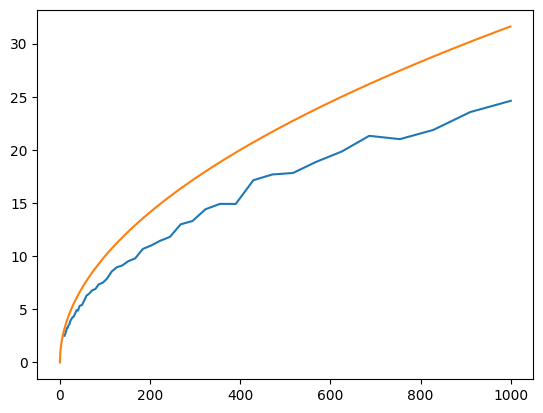

In [228]:
def avg_distance(number_of_steps: int, number_of_trials:int) -> float:
    avg_dist = 0
    for run in np.arange(number_of_trials):
        avg_dist += walk_distance(number_of_steps,False)

    avg_dist = avg_dist / number_of_trials
    return avg_dist

    
number_of_steps = 1000
number_of_trials = 1000
#res = avg_distance(number_of_steps,number_of_trials)
#print("The average distance upon termination is: %s" % res)

logspacing = 50
#this lets us plot the average distance at termination as a functio of many steps taken
plt.plot([int(step) for step in np.logspace(1,math.log10(number_of_steps),logspacing)], [avg_distance(int(step),number_of_trials) for step in np.logspace(1,math.log10(number_of_steps),logspacing)])
#plt.plot([x+1 for x in np.arange(1000)], [math.log(x+1) for x in np.arange(1000)])
plt.plot([x for x in np.arange(1000)], [math.sqrt(x) for x in np.arange(1000)])




I guessed that the distance from the origin went as distance ~ sqrt(N). After searching around I have found that this is the correct relationship. Once thing that is concerning is my data is much lower than sqrt(N). Perhaps it is just a proportionality? I need to look into this more. 

Some old code below that averages the distance over one run

In [229]:
#a function to calculate average distance from the origin for a random walk of N steps
def avg_walk_distance(number_of_steps: int, display_plot: bool) -> float:

    #intialize some values
    current_step = 0
    position = 0 #init position to the origin
    pos_history = np.array([])

    #pick a random direction (left or right) and move that way
    while(current_step < number_of_steps):
        random_number = random.randint(0,1)
        pos_history = np.append(pos_history,position) #store the current position
        if(random_number == 0):
            position += 1
        else:
            position -= 1

        current_step += 1

    #calculate the average position over the whole walk
    avg_pos = (sum([abs(pos_history[step]) for step in np.arange(number_of_steps)]))/(number_of_steps) #dist = abs in 1D
    #print("Average distance is: %s" % avg_pos)

    if(display_plot):
        #now plot it
        plt.plot([step for step in np.arange(number_of_steps)], [pos_history[step] for step in np.arange(number_of_steps)],color="blue")
        plt.axhline(y=0,color="black")

    return avg_pos